In [55]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml

data = fetch_openml('adult',version = 3, as_frame = True) #as_frame - It loads data as Pandas DataFrame.

df = data.frame

df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [56]:
df.shape

(48790, 15)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48789
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45175 non-null  int64   
 1   workclass       45175 non-null  category
 2   fnlwgt          45175 non-null  int64   
 3   education       45175 non-null  category
 4   education_num   45175 non-null  int64   
 5   marital_status  45175 non-null  category
 6   occupation      45175 non-null  category
 7   relationship    45175 non-null  category
 8   race            45175 non-null  category
 9   sex             45175 non-null  category
 10  capital_gain    45175 non-null  int64   
 11  capital_loss    45175 non-null  int64   
 12  hours_per_week  45175 non-null  int64   
 13  native_country  45175 non-null  category
 14  class           45175 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.8 MB


In [58]:
df['class'].value_counts() #check class imbalance

class
<=50K    37109
>50K     11681
Name: count, dtype: int64

In [59]:
df = df.dropna() # Remove rows having missing values

In [60]:
X = df.drop('class', axis=1)  # all columns except target
y = df['class'] # target

In [92]:
cat_cols = X.select_dtypes(include=['category','object']).columns # Identify categorical columns


X = pd.get_dummies(X, columns=cat_cols, drop_first=True) # Convert categorical to numeric using One-Hot Encoding

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
) # Split data for training and testing

In [63]:
# PART 1 - Train Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42) # Create Decision Tree model
dt.fit(X_train, y_train) # Train the model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

y_pred = dt.predict(X_test) # Predict on test data

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='>50K'))
print("Recall:", recall_score(y_test, y_pred, pos_label='>50K'))

Accuracy: 0.8087437742114001
Precision: 0.6021413276231263
Recall: 0.6376417233560091


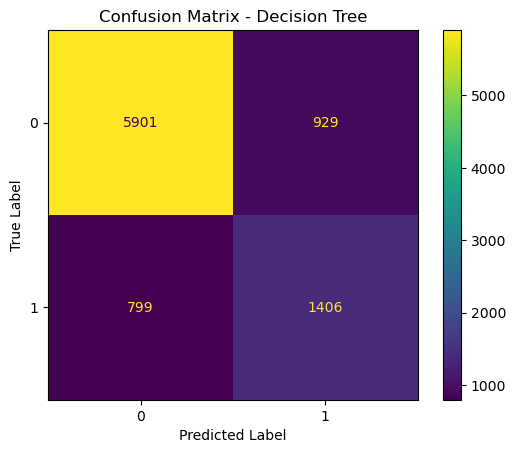

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
"""

Decision Tree – Confusion Matrix

- Correctly predicted <=50K: 5901 cases  
- Correctly predicted >50K: 1406 cases  

- Wrongly predicted >50K (False Positive): 929
- Wrongly predicted <=50K (False Negative): 799

- Model performs better on <=50K class. 
- Many wrong >50K predictions → low precision.  
- Shows overfitting and limited generalization.

"""

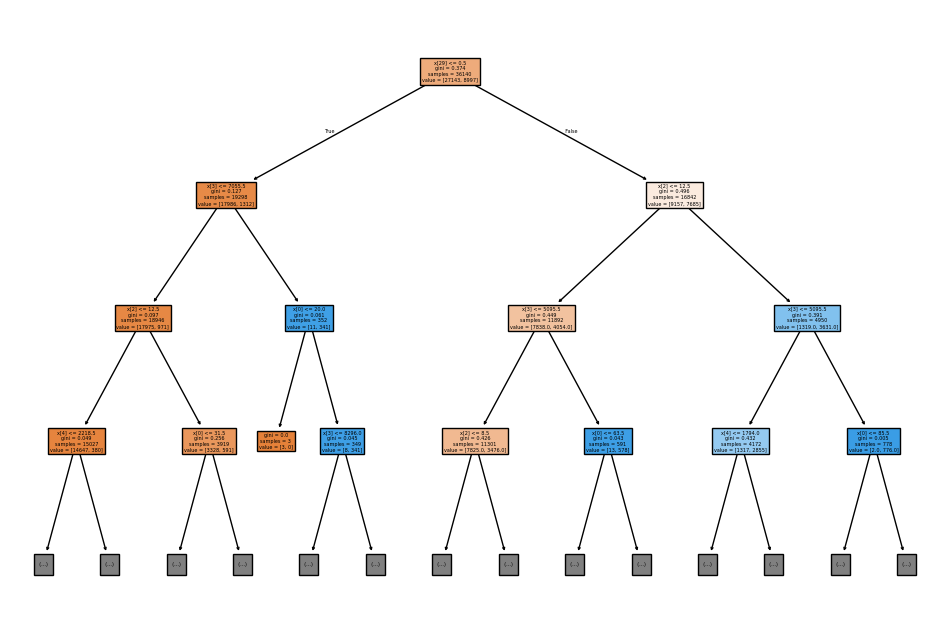

In [96]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Tree Visualization
plt.figure(figsize=(12,8))
plot_tree(dt, max_depth=3, filled=True)
plt.show()

In [ ]:
"""
Tree Visualization

- Displays decision logic of the Decision Tree.  
- Each split represents a rule based on a feature.  
- Helps understand how predictions are made.

"""

In [67]:
"""

1. Gini Impurity vs Entropy

- Gini Impurity and Entropy are measures used by Decision Trees to decide the best split at each node.

- Gini Impurity measures the probability of incorrectly classifying a randomly chosen sample if it was labeled according to the distribution of classes in that node. Lower Gini means the node is purer. It is computationally faster and is the default criterion in sklearn.

- Entropy measures the amount of disorder or uncertainty in a node based on information theory. If all samples in a node belong to one class, entropy is zero; if classes are equally mixed, entropy is maximum.

- In practice, both give almost similar trees. Gini is faster, while entropy is slightly more sensitive to class distribution.

2. Overfitting in Decision Trees

Overfitting occurs when a Decision Tree becomes too complex and learns even the noise and minor details of the training data instead of general patterns.

An overfitted tree:
- becomes very deep  
- creates many small leaf nodes  
- gives very high training accuracy  
- performs poorly on new test data

This happens because the tree keeps splitting until it perfectly classifies training samples, creating very specific rules that do not generalize.

3. Role of Parameters

max_depth  
Controls the maximum depth of the tree.  
- If max_depth is high → tree becomes complex → overfitting increases.  
- If max_depth is low → tree is simple → risk of underfitting.

min_samples_split  
Minimum number of samples required to split a node.  
- Higher value → fewer splits → simpler tree → overfitting decreases.  
- Lower value → more splits → complex tree → overfitting increases.

min_samples_leaf  
Minimum samples that must be present in a leaf node.  
- Higher value → larger leaf nodes → more stable model → overfitting decreases.  
- Lower value → very small leaves → model memorizes noise → overfitting increases.

max_features  
Number of features considered while making a split.  
- Higher value → tree looks at many features → power increases but overfitting may increase.  
- Lower value → more randomness → better generalization and reduced overfitting.

"""

In [68]:
# PART 2 - Random Forest & Ensembles

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
        n_estimators=100,
        random_state=42
)

rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
rf_pred = rf.predict(X_test)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      6830
        >50K       0.72      0.65      0.68      2205

    accuracy                           0.85      9035
   macro avg       0.81      0.78      0.79      9035
weighted avg       0.85      0.85      0.85      9035



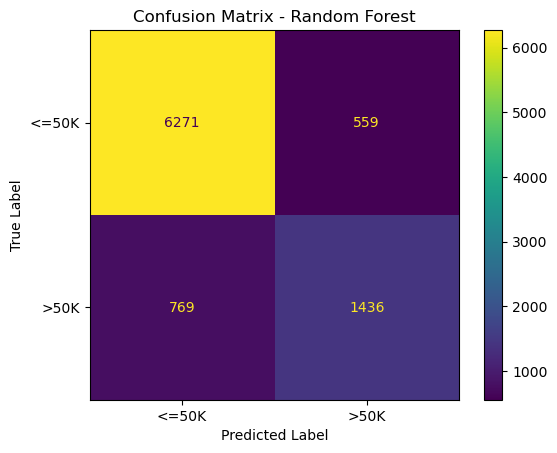

In [128]:
rf_pred = rf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, rf_pred)

disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["<=50K", ">50K"]
)

disp.plot()

plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
"""

Random Forest – Confusion Matrix Interpretation

- Correctly predicted <=50K: 6271
- Correctly predicted >50K: 1436

- False Positives (predicted >50K but actually <=50K): 559
- False Negatives (predicted <=50K but actually >50K): 769

- Random Forest improved predictions compared to Decision Tree.  
- Fewer false positives than Decision Tree (929 → 559).  
- Slight reduction in false negatives (799 → 769).  
- Model is more balanced and generalizes better.

"""

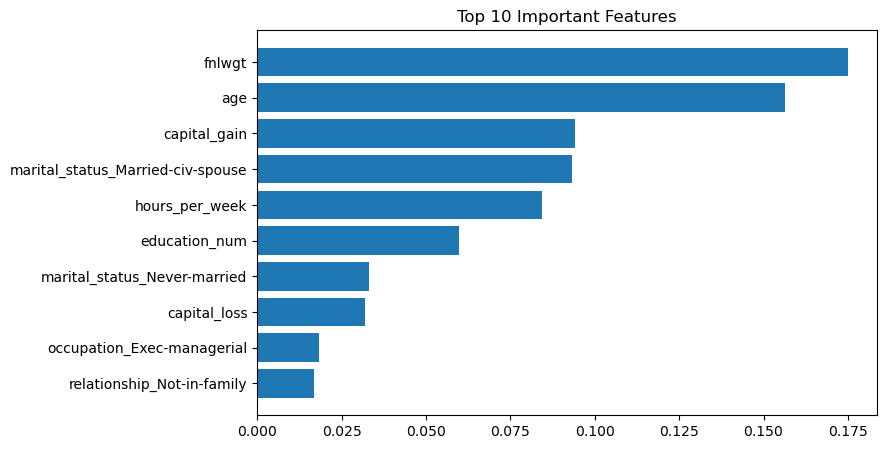

In [97]:
importances = rf.feature_importances_ # importance score of each feature

indices = np.argsort(importances)[-10:] # get indexes of top 10 features

# Feature Importance
plt.figure(figsize=(8,5))
plt.barh(range(10), importances[indices])
plt.yticks(range(10), X.columns[indices])
plt.title("Top 10 Important Features")
plt.show()

In [72]:
"""

1. Feature Importance

- Random Forest measures how much each feature helps in reducing impurity.
- Features that create better splits across many trees get higher importance scores.
- It helps to identify which variables (e.g., capital_gain, age) influence income prediction the most.
- Feature importance improves model interpretability and supports business understanding.

2.Bagging

- Bagging stands for Bootstrap Aggregating.
- Multiple training datasets are created by random sampling with replacement.
- A separate Decision Tree is trained on each sample.
- Final prediction is taken by majority voting (classification) or averaging (regression).
- Bagging reduces variance and makes the model more stable.

3. Why Random Forests Reduce Overfitting

- A single Decision Tree learns noise and specific patterns → overfits easily.
- Random Forest builds many trees on different data samples.
- Each tree also uses a random subset of features at every split.
- Errors of individual trees cancel out through voting.
- This averaging effect lowers variance and improves generalization on unseen data.

"""

In [ ]:
"""

Comparison : Decision Tree vs Random Forest


- Random Forest accuracy (~0.85) is higher than Decision Tree (~0.80).

- Precision for >50K increased from ~0.60 → 0.72.

- Recall for >50K improved from ~0.63 → 0.65.

- F1-score also increased, showing more balanced predictions.

- Decision Tree showed signs of overfitting with lower test performance.

- Random Forest reduced overfitting through bagging and averaging of many trees.

- Random Forest clearly outperforms Decision Tree on all evaluation metrics.

- Therefore Random Forest is a better model for income prediction.

"""

In [73]:
# PART 3 - Gradient Boosting (XGBoost / LightGBM)

In [ ]:
"""

1. Boosting vs Bagging

- Bagging (Random Forest):  
  Models are trained independently in parallel and results are averaged to reduce variance.

- Boosting (XGBoost):  
  Models are trained sequentially where each new model focuses on correcting the errors of the previous one.  
  This reduces both bias and variance.

2. Sequential learning 

- It is a training approach where the model learns step-by-step from data in order, updating its knowledge after each sample or small batch instead of using the whole dataset at once.
- It is commonly used in online learning and time-series problems where new data keeps arriving.
- Requires less memory
- Can adapt to new patterns quickly

3. Learning Rate

- Learning rate is a hyperparameter that controls how much the model’s weights change after each update during training.
- High learning rate → model learns fast but may overfit 
- Low learning rate → slower learning but better generalization

"""

In [ ]:
# Implementing Gradient Boosting using XGBoost

In [99]:
!pip install xgboost

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_enc = le.fit_transform(y_train) #XGBoost cannot understand text; LabelEncoder converts it into numbers
y_test_enc = le.fit_transform(y_test)

from xgboost import XGBClassifier

xgb = XGBClassifier (n_estimators = 100, 
                     learning_rate = 0.1,
                     max_depth = 6, 
                     random_state = 42,
                     eval_metric = 'logloss') # metric used to measure training performance ; Logloss = error in predicted probabilities

xgb.fit(X_train,y_train_enc)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [106]:
pred = xgb.predict(X_test) # Predict on test data; gives numeric labels

pred_labels = le.inverse_transform(pred) # Converting numeric predictions back to original class names

print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      6830
        >50K       0.78      0.68      0.72      2205

    accuracy                           0.87      9035
   macro avg       0.84      0.81      0.82      9035
weighted avg       0.87      0.87      0.87      9035



In [ ]:
"""

Comparison: Random Forest vs XGBoost

- XGBoost accuracy 0.87 is higher than Random Forest 0.85.
- Precision for >50K improved from 0.72 → 0.78.
- Recall for >50K improved from 0.65 → 0.68.
- F1-score for >50K increased from 0.68 → 0.72.
- XGBoost focuses on previous errors using sequential learning.
- Boosting reduces both bias and variance, RF mainly reduces variance.
- XGBoost requires label encoding and parameter tuning.
- Overall, XGBoost is the better performing model for this dataset than RF.

"""

In [ ]:
# Implementing Gradient Boosting using LightGBM (for learning purpose)

In [107]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
    n_estimators= 100,
    learning_rate=0.1,
    max_depth= 6,
    random_state= 42
)

lgb.fit(X_train,y_train_enc)

[LightGBM] [Info] Number of positive: 8997, number of negative: 27143
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 36140, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.248949 -> initscore=-1.104228
[LightGBM] [Info] Start training from score -1.104228
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [108]:
lgb_pred = lgb.predict(X_test)

lgb_pred_labels = le.inverse_transform(lgb_pred)

print(classification_report(y_test,lgb_pred_labels))

              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      6830
        >50K       0.78      0.67      0.72      2205

    accuracy                           0.87      9035
   macro avg       0.84      0.80      0.82      9035
weighted avg       0.87      0.87      0.87      9035



In [ ]:
"""
1. LightGBM vs Random Forest

- LightGBM accuracy 0.87 is higher than RF 0.85.
- Precision for >50K: 0.78 (LGBM) > 0.72 (RF).
- Recall for >50K: 0.67 (LGBM) > 0.65 (RF).
- RF uses bagging; LightGBM uses boosting with sequential learning.
- LightGBM handles complex relations better than RF.
- RF is more stable with less tuning; LGBM needs tuning.
- Overall, LightGBM clearly outperforms Random Forest.

2. LightGBM vs XGBoost
- Performance metrics of both models are almost similar with accuracy around 0.87.
- LightGBM grows trees leaf-wise, XGBoost grows level-wise.
- LightGBM trains faster and uses less memory.
- Performance difference is minimal; both are strong boosting models.
- XGBoost slightly better for recall; LightGBM better for training speed and efficiency.

"""

In [ ]:
# Part 4 -  Hyperparameter Tuning & Interpretability

In [ ]:
# Hyperparameter Tuning using RandomizedSearchCV

In [119]:
from sklearn.model_selection import RandomizedSearchCV

# Dictionary of hyperparameters to try
param_dist = {
    'n_estimators': [60, 80, 100, 120],  # number of trees
    'max_depth': [4, 5, 6, 7],           # depth of each tree
    'learning_rate': [0.03, 0.05, 0.1, 0.2]   # step size while learning
}

random_search = RandomizedSearchCV(
    
        XGBClassifier(eval_metric='logloss', random_state=42), # Base model on which tuning will happen
        param_distributions=param_dist ,  # hyperparameter search space
        n_iter=6,       # try only 6 random combinations
        cv=3,           # 3-fold cross validation
        scoring='accuracy',  # choose best model based on accuracy
        random_state=42     
)

random_search.fit(X_train, y_train_enc) # Train multiple models with different combinations

print(random_search.best_params_)

best_random = random_search.best_estimator_

pred_random = best_random.predict(X_test)
pred_random_labels = le.inverse_transform(pred_random)

print(classification_report(y_test, pred_random_labels))

{'n_estimators': 60, 'max_depth': 5, 'learning_rate': 0.2}
              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.92      6830
        >50K       0.77      0.67      0.72      2205

    accuracy                           0.87      9035
   macro avg       0.83      0.80      0.82      9035
weighted avg       0.87      0.87      0.87      9035



In [ ]:
# Hyperparameter Tuning using GridSearchCV

In [118]:
from sklearn.model_selection import GridSearchCV

# All possible combinations that GridSearch will try
param_grid = {
    'n_estimators': [80, 100],      # number of trees
    'max_depth': [4, 6],            # depth of each tree
    'learning_rate': [0.05, 0.1]    # step size while learning
}

grid = GridSearchCV(

        XGBClassifier(eval_metric='logloss', random_state=42),
        param_grid,     # hyperparameter combinations
        cv=3,        
        scoring='accuracy'  # choose best model based on accuracy  
)


grid.fit(X_train, y_train_enc)


print(grid.best_params_)

best_xgb = grid.best_estimator_

pred = best_xgb.predict(X_test)
pred_labels = le.inverse_transform(pred)

print(classification_report(y_test, pred_labels))

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      6830
        >50K       0.78      0.68      0.72      2205

    accuracy                           0.87      9035
   macro avg       0.84      0.81      0.82      9035
weighted avg       0.87      0.87      0.87      9035



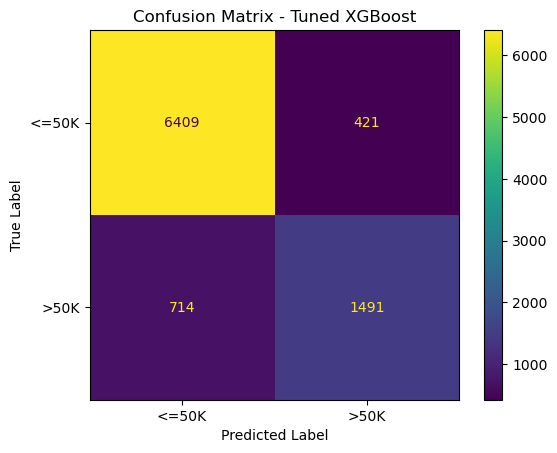

In [131]:
# Create confusion matrix
cm = confusion_matrix(y_test, pred_labels)

disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["<=50K", ">50K"]
)

disp.plot()

plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
"""
Tuned XGBoost – Confusion Matrix 

- Correctly predicted <=50K: 6409
- Correctly predicted >50K: 1491

- False Positives (predicted >50K but actually <=50K): 421
- False Negatives (predicted <=50K but actually >50K): 714

- Tuned XGBoost gives the best results among all models.
- False positives reduced significantly compared to RF (559 → 421).  
- False negatives also decreased (769 → 714).  
- Tuned XGBoost generalizes well and is selected as the final model for income prediction.

"""

In [ ]:
"""

Comparison: RandomizedSearchCV vs GridSearchCV

- Both methods produced almost same accuracy (0.87).
- GridSearch gave slightly better precision and recall.
- RandomizedSearch was faster and explored wider range.
- GridSearch performed fine tuning on limited combinations.
- Improvement over default model is small but consistent.
- Tuned XGBoost remains the best final model.

"""

In [ ]:
# SHAP Values

In [124]:
!pip install shap

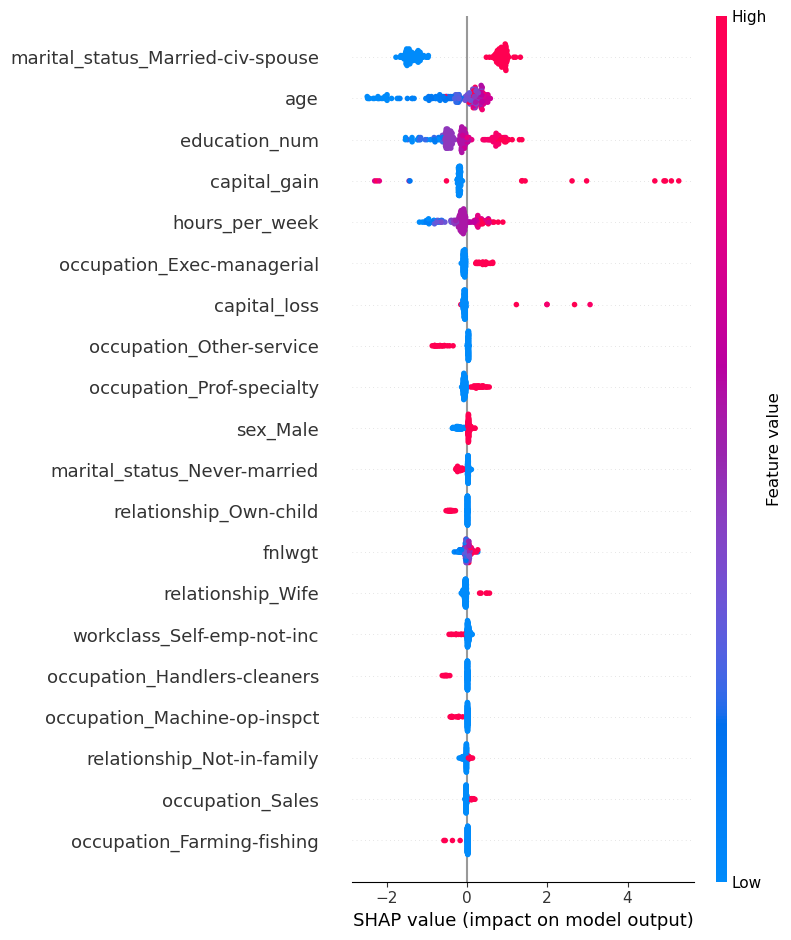

In [123]:
import shap

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test[:200]) # Calculate SHAP values for first 200 test samples

shap.summary_plot(shap_values, X_test[:200])


In [ ]:
"""

SHAP Values Interpretation

- The SHAP summary plot explains how each feature influences the XGBoost predictions.

- Red dots → higher feature values and Blue dots → lower feature values  

- Position to the right → increases chance of >50K and Position to the left → increases chance of ≤50K

- Income is strongly related to marital status, education level and age.  

- Working hours and occupation also influence the model decisions.  

"""